In [22]:
def read_results(result_path):
    with open(result_path,"r") as result_file:
        result = result_file.readlines()
#         print(result)
        mAP = int(float(result[0][-7:-1])*10000)/100
        AP_1 = int(float(result[1][-7:-1])*10000)/100
        AP_2 = int(float(result[2][-7:-1])*10000)/100
        mAE = int(float(result[3][-7:-1])*10000)/100
        AE_1 = int(float(result[4][-7:-1])*10000)/100
        AE_2 = int(float(result[5][-7:-1])*10000)/100
    return {"AP_1":AP_1, "AP_2":AP_2, "mAP":mAP, "AE_1":AE_1, "AE_2":AE_2, "mAE":mAE}

save_fig = True

In [23]:
import pandas as pd

methods = ["R_50_C4_1x", "R_50_FPN_1x", "R_101_FPN_1x", "X_101_32x8d_FPN_1x"]
metrics = ["mAP", "AP_1", "AP_2", "mAE", "AE_1", "AE_2"]

stats = 8

df = pd.DataFrame(columns=metrics, index=methods)
df = pd.DataFrame(columns=metrics)

for method in methods:
    
#     results = {metric:0 for metric in metrics}
    for i in range(1,stats+1):
        result_path = f"/media/giancos/Football/CloudLabeling_DS/CloudLabeling/Seeds_Striga_Strategy1/output/{method}_{i}/inference/folder_test/result.txt"
        result = read_results(result_path)
        result.update({"method":method})
        
        df = df.append(result, ignore_index=True)

# print(df)


In [24]:

df_mean = pd.DataFrame(columns=metrics)
df_std = pd.DataFrame(columns=metrics)
for method in df["method"].unique():
    results_method = df[df["method"] == method]
    df_mean = df_mean.append(results_method.mean(axis=0), ignore_index=True)
#     df_std = df_std.append(results_method.quantile(q=.6,axis=0) - results_method.quantile(q=.4,axis=0), ignore_index=True)
    df_std = df_std.append(results_method.std(axis=0), ignore_index=True)
# print("Mean")
# print(df_mean)
# print("Error")
# print(df_std)


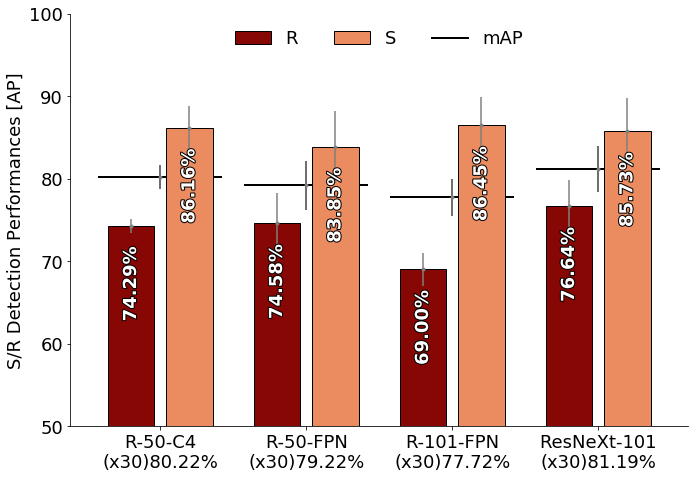

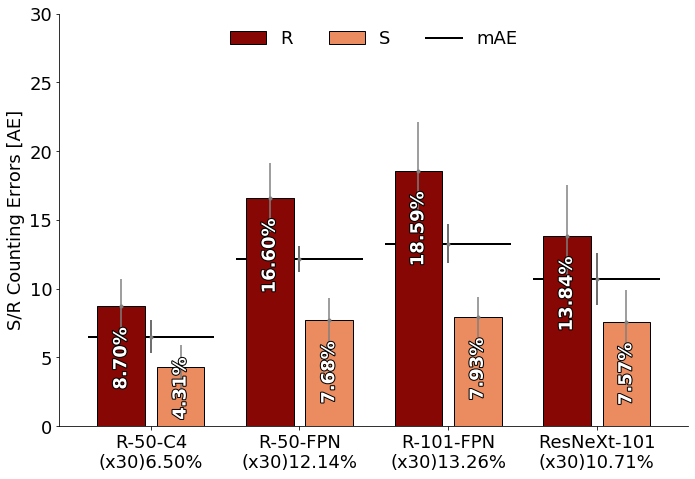

      mAP   AP_1   AP_2   mAE  AE_1  AE_2      method
19  80.97  74.97  86.97  4.08  4.75  3.41  R_50_C4_1x


In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import matplotlib.patheffects as PathEffects
import matplotlib.transforms as mtransforms

import pandas as pd

from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Times New Roman'], 'size':14})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Futura"
plt.rcParams["font.size"] = 18
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)


def createFigures(pretrained=True, 
                  strategy=1,
                  data="Seeds_Striga_Strategy1", 
                  main_folder="/media/giancos/Football/CloudLabeling/",
                  save_fig=True,
                  verbose=False,
                  ylim_detection = (50,100),
                  ylim_counting = (0,30)):
    
    
    



# for pretrained in [False, True]:

#     # Loop over 2 strategies
#     for strategy in [1,2]:


        df_mean = pd.DataFrame(columns=metrics)
        df_std = pd.DataFrame(columns=metrics)
        df = pd.DataFrame(columns=metrics)
        df_cnt = []

        
        for method in methods:
            for i in range(1,31):
                pre = "_pre" if pretrained else ""
                result_path = f"{main_folder}/{data}/output/{method}{pre}_{i}/inference/folder_test/result.txt"
                if os.path.exists(result_path):
                    result = read_results(result_path)
                    if result["mAP"] > 50: # Manually remove outliers
                        result.update({"method":method})

                        df = df.append(result, ignore_index=True)


    # for method in df["method"].unique():
            results_method = df[df["method"] == method]
            df_mean = df_mean.append(results_method.mean(axis=0), ignore_index=True)
        #     df_std = df_std.append(results_method.quantile(q=.6,axis=0) - results_method.quantile(q=.4,axis=0), ignore_index=True)
            df_std = df_std.append(results_method.std(axis=0), ignore_index=True)
#             print(len(results_method))
            df_cnt.append(len(results_method))
        
        if verbose:
            print(df)
            print("Mean")
            print(df_mean)
            print("Error")
            print(df_std)
            print("CNT")
            print(df_cnt)


        if strategy == 1 :
            label1='GS'
#             color1="green"
            color1=(17/255, 172/255, 222/255)
            label2='N-GS'
#             color2="orange"
            color2=(32/255, 36/255, 143/255)
            y_axis="N-GS/GS"
        elif strategy == 2 :
            label1='R'
#             color1="brown"
            color1=(134/255, 7/255, 3/255)
            label2='S'
#             color2="coral"
            color2=(234/255, 140/255, 95/255)
            y_axis="S/R"


        for performances in ["Detection Performances", "Counting Errors"]:

            labels = ["R-50-C4", "R-50-FPN", "R-101-FPN", "ResNeXt-101"] 
            for i, cnt in enumerate(df_cnt):
                labels[i] += f"\n(x{cnt})"
                
            
            if "Detection" in performances:
                metric = "AP"
                ylim = ylim_detection #(50,100)
            elif "Counting" in performances:
                metric = "AE"
                ylim = ylim_counting

    #         print(df[f"{metric}_1"])
            perf_1 = list(df_mean[f"{metric}_1"]) 
            err_1 = list(df_std[f"{metric}_1"]) 
            perf_2 = list(df_mean[f"{metric}_2"]) 
            err_2 = list(df_std[f"{metric}_2"]) 
            perf_m = list(df_mean[f"m{metric}"]) 
            err_m = list(df_std[f"m{metric}"]) 
    #             print(perf_1,perf_2,perf_m)
    
            for i, cnt in enumerate(df_cnt):
                labels[i] += f"{perf_m[i]:2.2f}%"

            x = np.arange(len(labels))  # the label locations
            width = 0.4  # the width of the bars

            fig, ax = plt.subplots(figsize=(10,7))

            rects1 = ax.bar(x - width/2, perf_1, width/1.25, label=label1,
                            color=color1, linewidth=1, edgecolor="k", zorder=3)
            plt.errorbar(x - width/2, perf_1, yerr=err_1, 
                         fmt='.',zorder=4, color="grey");
            rects2 = ax.bar(x + width/2, perf_2, width/1.25, label=label2,
                            color=color2, linewidth=1, edgecolor="k", zorder=3)
            plt.errorbar(x + width/2, perf_2, yerr=err_2, 
                         fmt='.',zorder=4, color="grey");

            rectsm = ax.bar(x, 0, 0.85, bottom=perf_m, label=f'm{metric}', yerr=err_m,
                            color = "k", linewidth=2, edgecolor="k" , zorder=2)
#             rectsm = ax.bar(x, perf_m, 0.85, label=f'm{metric}', yerr=err_m,
#                             color = "grey", linewidth=2, edgecolor="k" , zorder=2)

            ax.errorbar(x, perf_m, yerr=err_m, 
                         fmt='.',zorder=4, color="grey");
            plotm = ax.plot([x-width, x+width], [perf_m, perf_m],  label=f'm{metric}', color = "k",linewidth=2,  zorder=2)


            plt.ylabel(f'{y_axis} {performances} [{metric}]')
#             plt.title(f'{performances} for Strategy {strategy}')
            plt.xticks(x,rotation=0)            
            ax.set_xticklabels(labels)
    #             ax.legend()
            ax.legend((rects1, rects2, plotm[0]), (label1, label2, f'm{metric}'), ncol=3, loc='upper center', frameon=False)
#             ax.legend((rects1, rects2), (label1, label2))

            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
    #             ax.spines['bottom'].set_visible(False)
    #             ax.spines['left'].set_visible(False)

            plt.ylim(ylim)
    #             plt.grid(True, axis='y')

    #             def autolabel(rects):
    #                 """Attach a text label above each bar in *rects*, displaying its height."""
    #             print(rects2)
            for i, (rect1, rect2, rectm) in enumerate(zip(rects1, rects2, rectsm)):
                for rect in [rect1, rect2]:

                    trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                           x=0, y=-0, units='points')
#                     height = (ylim[0] + rect.get_height())/2
                    if (rect.get_height() <10):
                        height = max( ylim[0] + (ylim[1] - ylim[0]) / 6, rect.get_height() - (ylim[1] - ylim[0]) / 20 )
                    else:
                        height = max( ylim[0] + (ylim[1] - ylim[0]) / 5, rect.get_height() - (ylim[1] - ylim[0]) / 20 )
#                     height =  rect.get_height()

                    txt = plt.text(rect.get_x() + rect.get_width() / 2, height, f'{rect.get_height():2.2f}%',
                             color='w',ha='center', va='top',rotation=90,  transform=trans_offset, weight="bold", zorder = 5)
    #                     ax.annotate(f' {rect.get_height():2.2f}',
    #                                 xy=(rect.get_x() + rect.get_width() / 2, ylim[0]),
    #                                 xytext=(0, 3),  # 3 points vertical offset
    #                                 textcoords="offset points",
    #                                 ha='center', va='bottom',rotation=90, size=20)
                    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])

        
#                 value = perf_m[i]
#                 height = perf_m[i] #ylim[0]
#                 height = ylim[0]
#                 height = max(perf_1[i], perf_2[i])
#                 trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
#                                        x=0, y=5, units='points')
#                 txt = plt.text(rectm.get_x() + rectm.get_width() / 2, height, f'{value:2.2f}%', 
#                                color='black', ha='center',va='bottom' ,transform=trans_offset, weight="bold")
#                 txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])




            fig.tight_layout()
            pre = "pretrain" if pretrained else "no_pretrain"
            folder=f"/home/giancos/Dropbox/Applicazioni/ShareLaTeX/SeedsResults/{data}"
            os.makedirs(folder, exist_ok=True)
            if save_fig:
                plt.savefig(f"{folder}/{performances.split(' ')[0]}_{pre}_stats.png")
                plt.savefig(f"{folder}/{performances.split(' ')[0]}_{pre}_stats.pdf")
                plt.savefig(f"{folder}/{performances.split(' ')[0]}_{pre}_stats.eps")
#             if verbose:
            plt.show()

        return df
                            
save_fig=False
verbose=False
# createFigures(pretrained=True, 
#               strategy=2,
#               data="Seeds_Orobanche_Strategy2", 
#               main_folder="/media/giancos/Football/CloudLabeling/",
#               save_fig=save_fig,
#               verbose=verbose,
#               ylim_counting=(0,70))

# createFigures(pretrained=False, 
#               strategy=2,
#               data="Seeds_Orobanche_Strategy2", 
#               main_folder="/media/giancos/Football/CloudLabeling/",
#               save_fig=save_fig,
#               verbose=verbose,
#               ylim_counting=(0,70))

# createFigures(pretrained=True, 
#               strategy=1,
#               data="Seeds_Striga_Strategy1", 
#               main_folder="/media/giancos/Football/CloudLabeling/",
#               save_fig=save_fig,
#               verbose=verbose)
                            
df = createFigures(pretrained=True, 
              strategy=2,
              data="Seeds_Striga_Strategy2", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose)
                          
# print(df)
print(df[df.mAE == df.mAE.min()]) 

# print(df)
                 

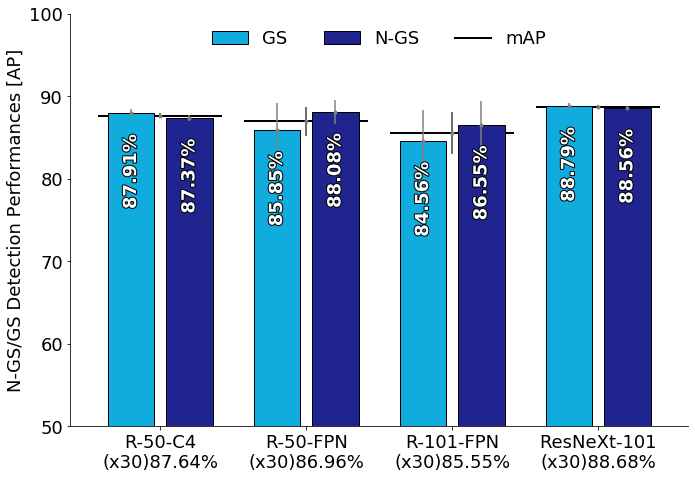

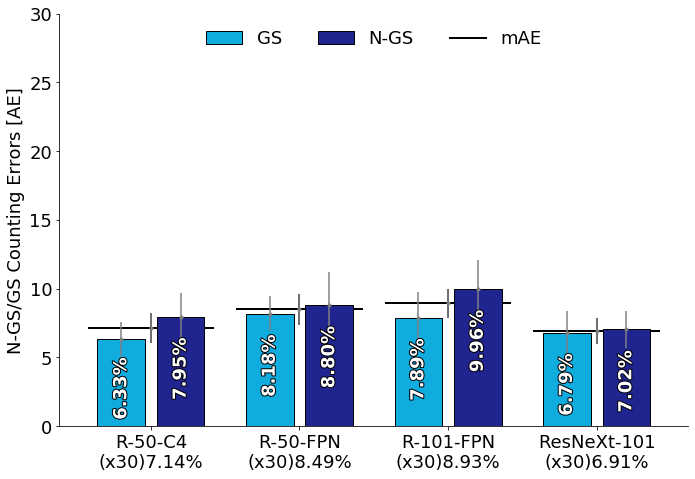

       mAP   AP_1   AP_2   mAE   AE_1   AE_2              method
0    87.84  88.09  87.59  8.26   8.74   7.77          R_50_C4_1x
1    87.87  87.74  87.99  6.23   5.37   7.08          R_50_C4_1x
2    87.37  87.12  87.62  9.36   5.80  12.91          R_50_C4_1x
3    87.75  88.22  87.28  9.39   5.73  13.05          R_50_C4_1x
4    87.29  87.09  87.49  6.68   6.30   7.06          R_50_C4_1x
5    87.58  87.86  87.31  7.32   6.73   7.90          R_50_C4_1x
6    87.25  87.60  86.90  8.12   7.22   9.01          R_50_C4_1x
7    87.00  87.39  86.60  6.30   6.13   6.48          R_50_C4_1x
8    87.78  88.12  87.43  6.13   6.22   6.04          R_50_C4_1x
9    87.11  87.79  86.43  5.36   4.41   6.31          R_50_C4_1x
10   87.12  87.20  87.03  7.65   8.16   7.14          R_50_C4_1x
11   87.84  88.10  87.59  7.17   7.34   7.01          R_50_C4_1x
12   87.75  88.81  86.70  6.89   5.99   7.79          R_50_C4_1x
13   88.18  88.55  87.80  6.97   6.23   7.71          R_50_C4_1x
14   88.28  88.52  88.03 

In [45]:
# MAIN RESULTS FOR STRIGA
save_fig=False
verbose=False
                            
df = createFigures(pretrained=True, 
              strategy=1,
              data="Seeds_Striga_Strategy1", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose)

# createFigures(pretrained=False, 
#               strategy=1,
#               data="Seeds_Striga_Strategy1", 
#               main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
#               save_fig=save_fig,
#               verbose=verbose)
                            
# createFigures(pretrained=True, 
#               strategy=2,
#               data="Seeds_Striga_Strategy2", 
#               main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
#               save_fig=save_fig,
#               verbose=verbose)

# createFigures(pretrained=False, 
#               strategy=2,
#               data="Seeds_Striga_Strategy2", 
#               main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
#               save_fig=save_fig,
#               verbose=verbose)

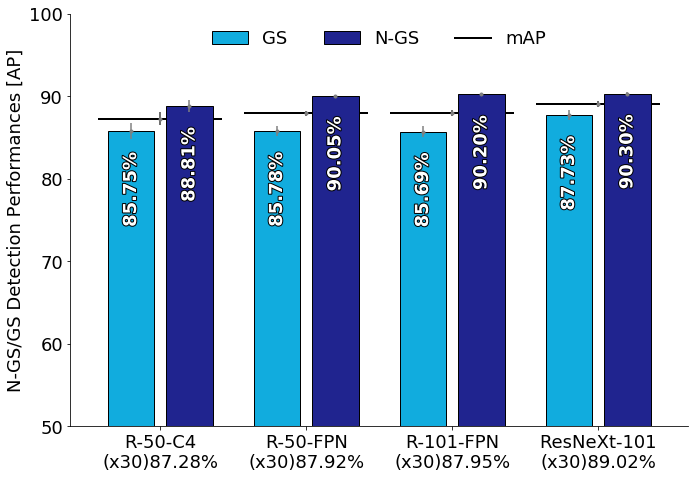

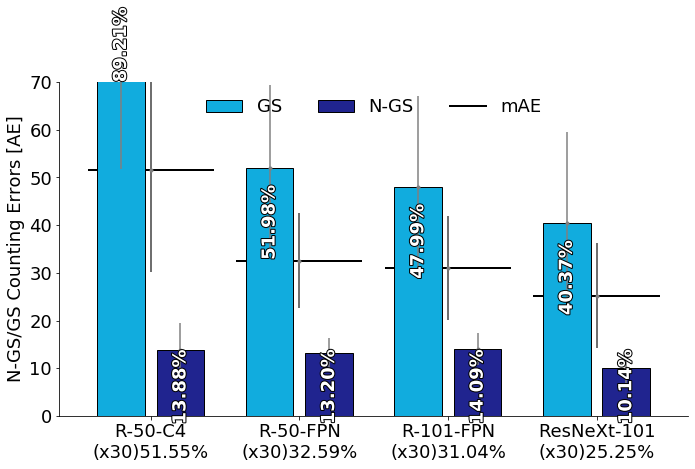

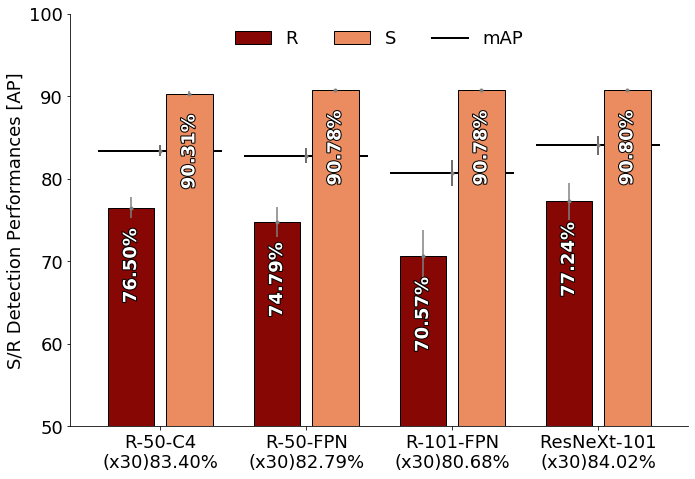

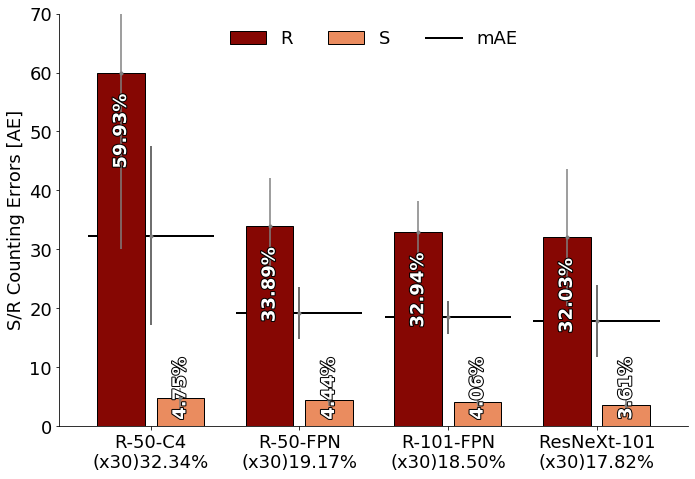

In [27]:
# 1 As is transfered to Orobanche on all images

createFigures(pretrained=True, 
              strategy=1,
              data="Seeds_Orobanche_Strategy1", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,
              ylim_counting=(0,70))
createFigures(pretrained=True, 
              strategy=2,
              data="Seeds_Orobanche_Strategy2", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,
              ylim_counting=(0,70))


In [28]:
# 2 As is transfered to Orobanche on limited testing only  (40/10/10)
# createFigures(pretrained=True, 
#               strategy=2,
#               data="Seeds_Orobanche_Strategy2_test_401010", 
#               main_folder="/media/giancos/Football/CloudLabeling/",
#               save_fig=True,
#               verbose=False,
#               ylim_counting=(0,70))


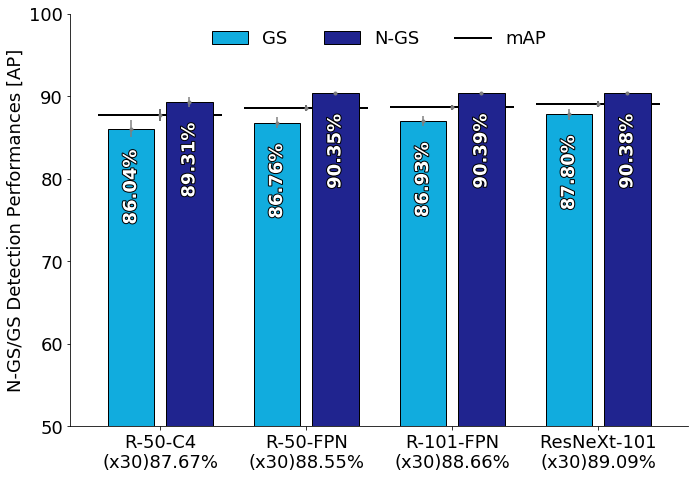

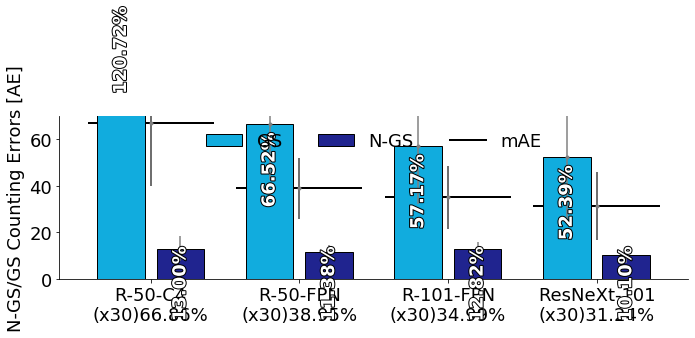

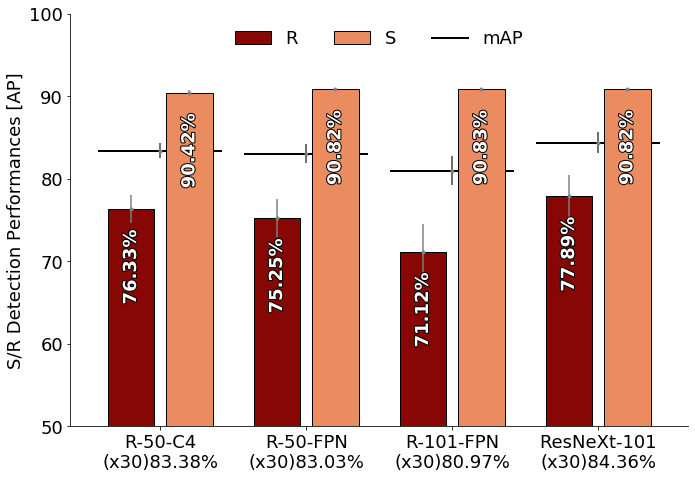

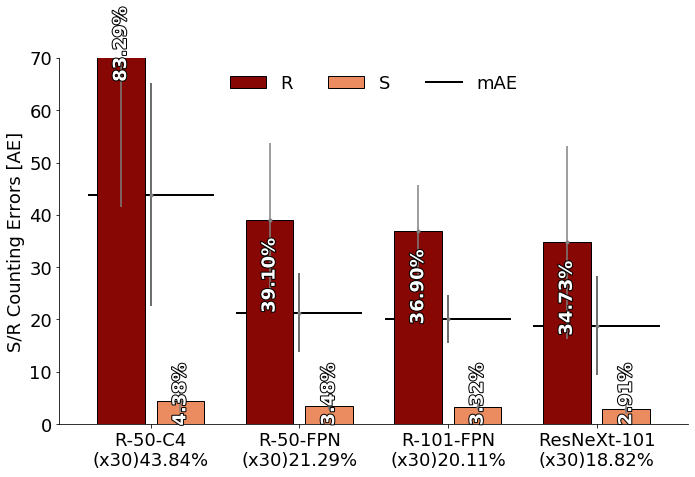

In [29]:
# 2 As is transfered to Orobanche on limited testing only  (20/10/30)

createFigures(pretrained=True, 
              strategy=1,
              data="Seeds_Orobanche_Strategy1_test_201030", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,
              ylim_counting=(0,70))

createFigures(pretrained=True, 
              strategy=2,
              data="Seeds_Orobanche_Strategy2_test_201030", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,
              ylim_counting=(0,70))


In [30]:
# 3 Fine-tuned to Orobanche on limited testing only  (40/10/10)
# createFigures(pretrained=True, 
#               strategy=2,
#               data="Seeds_Orobanche_Strategy2_finetuning_401010", 
#               main_folder="/media/giancos/Football/CloudLabeling/",
#               save_fig=True,
#               verbose=False,
#               ylim_counting=(0,70))


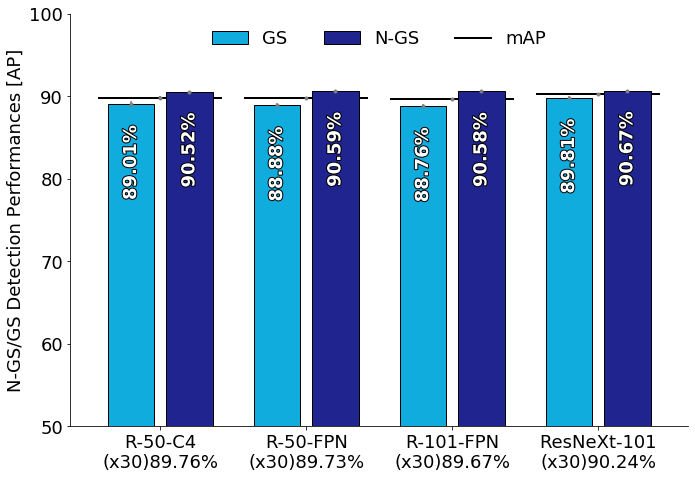

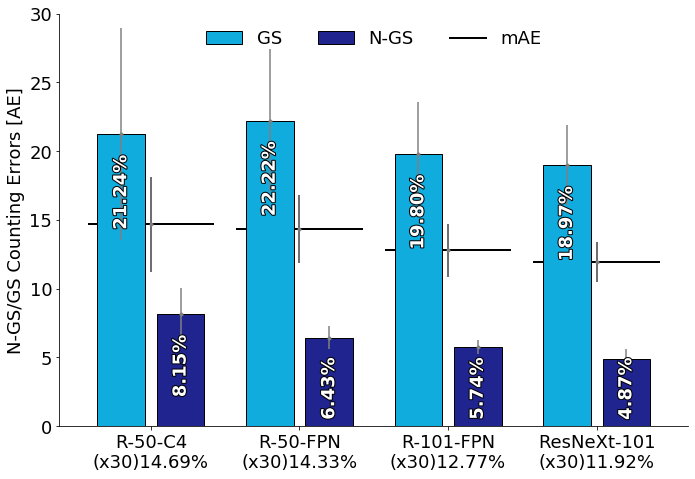

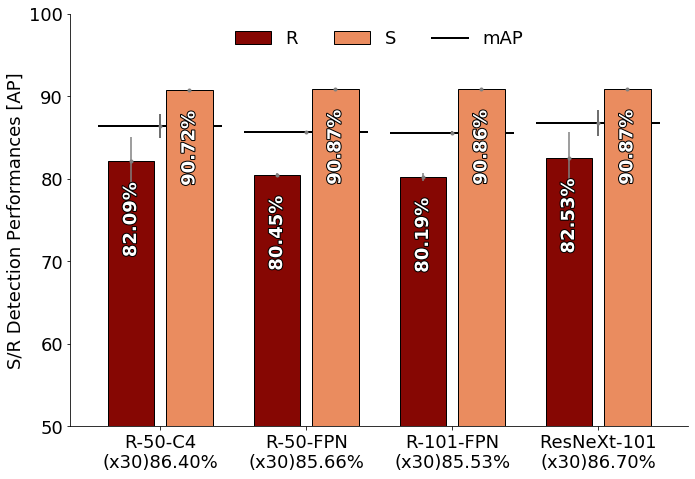

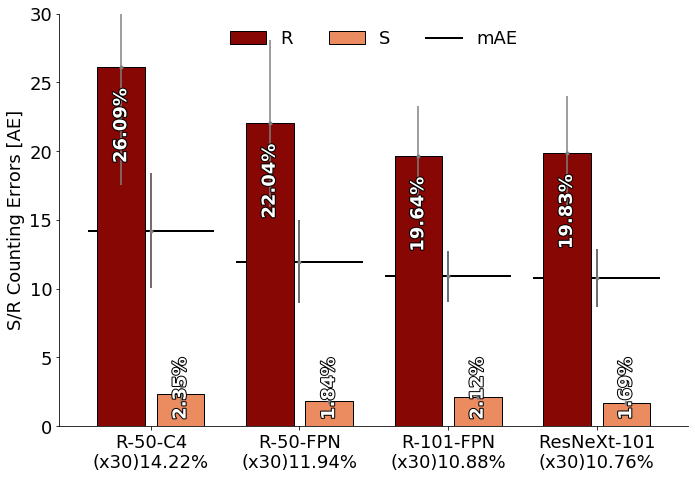

In [31]:
# 3 Fine-tuned to Orobanche on limited testing only  (20/10/30)
createFigures(pretrained=True, 
              strategy=1,
              data="Seeds_Orobanche_Strategy1_finetuning_201030", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,)

createFigures(pretrained=True, 
              strategy=2,
              data="Seeds_Orobanche_Strategy2_finetuning_201030", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,)


In [32]:
# 4 Trained from scratch to Orobanche on limited testing only  (40/10/10)
# createFigures(pretrained=True, 
#               strategy=2,
#               data="Seeds_Orobanche_Strategy2_scratch_401010", 
#               main_folder="/media/giancos/Football/CloudLabeling/",
#               save_fig=True,
#               verbose=False,
#               ylim_counting=(0,70))


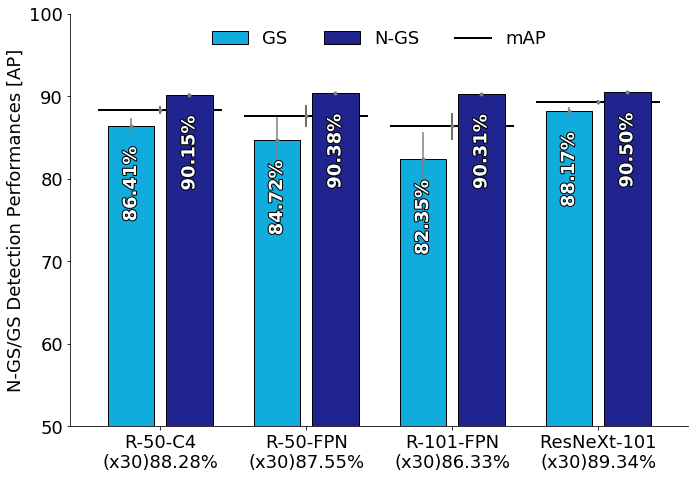

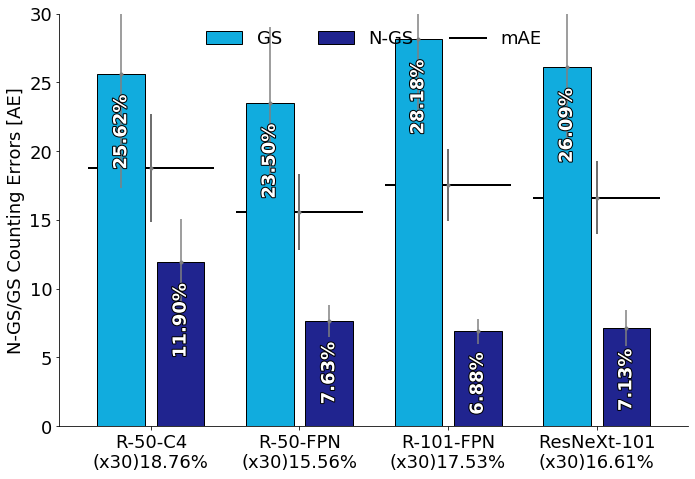

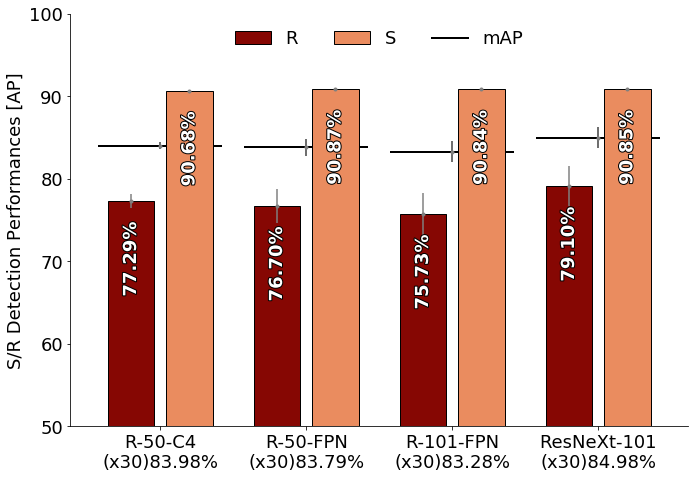

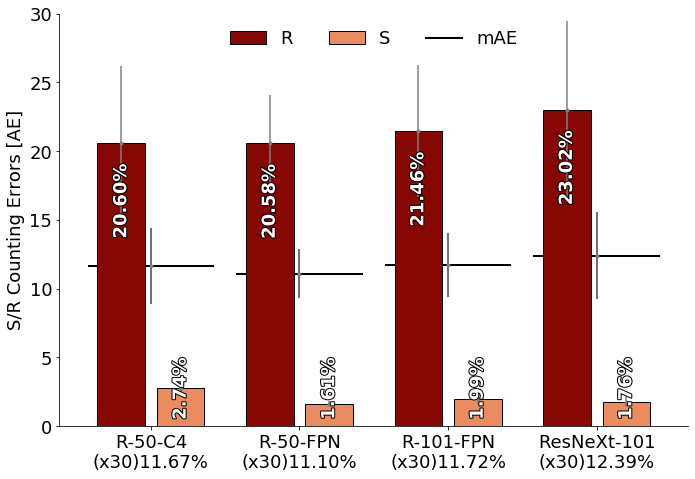

In [33]:
# 4 Trained from scratch to Orobanche on limited testing only  (20/10/30)
createFigures(pretrained=True, 
              strategy=1,
              data="Seeds_Orobanche_Strategy1_scratch_201030", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,)

createFigures(pretrained=True, 
              strategy=2,
              data="Seeds_Orobanche_Strategy2_scratch_201030", 
              main_folder="/media/giancos/Football/CloudLabeling_DS/CloudLabeling/",
              save_fig=save_fig,
              verbose=verbose,)
